In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix  , classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("titanic_train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df=pd.DataFrame(df)

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

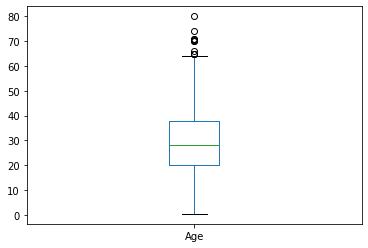

In [8]:
df['Age'].plot.box()

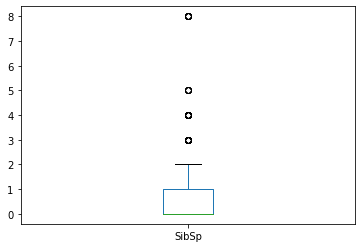

In [9]:
df['SibSp'].plot.box()

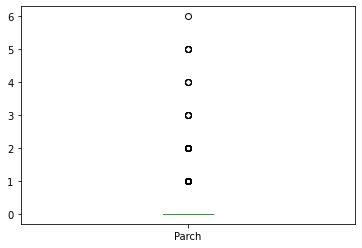

In [10]:
df['Parch'].plot.box()

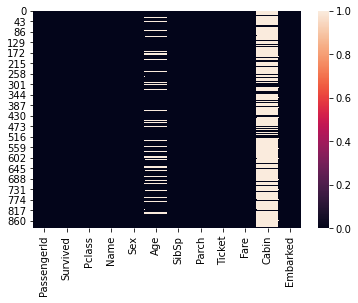

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.show()

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy='mean')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [16]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [17]:
le=LabelEncoder()
list1=['Sex','Embarked']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    

In [18]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [20]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

In [21]:
df1=df.drop("Survived",axis=1)
df_target=df["Survived"]

In [22]:
print(df.shape,df1.shape,df_target.shape,df1.columns,sep="\n______________________\n")

(891, 9)
______________________
(891, 8)
______________________
(891,)
______________________
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [23]:
df1.describe

<bound method NDFrame.describe of      PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0              1       3    1  22.000000      1      0   7.2500         2
1              2       1    0  38.000000      1      0  71.2833         0
2              3       3    0  26.000000      0      0   7.9250         2
3              4       1    0  35.000000      1      0  53.1000         2
4              5       3    1  35.000000      0      0   8.0500         2
..           ...     ...  ...        ...    ...    ...      ...       ...
886          887       2    1  27.000000      0      0  13.0000         2
887          888       1    0  19.000000      0      0  30.0000         2
888          889       3    0  29.699118      1      2  23.4500         2
889          890       1    1  26.000000      0      0  30.0000         0
890          891       3    1  32.000000      0      0   7.7500         1

[891 rows x 8 columns]>

In [24]:
df1.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013083
Pclass,-0.035144,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.157112
Sex,0.042939,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057
Age,0.033207,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239
SibSp,-0.057527,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654
Parch,-0.001652,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322
Fare,0.012658,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226
Embarked,0.013083,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000


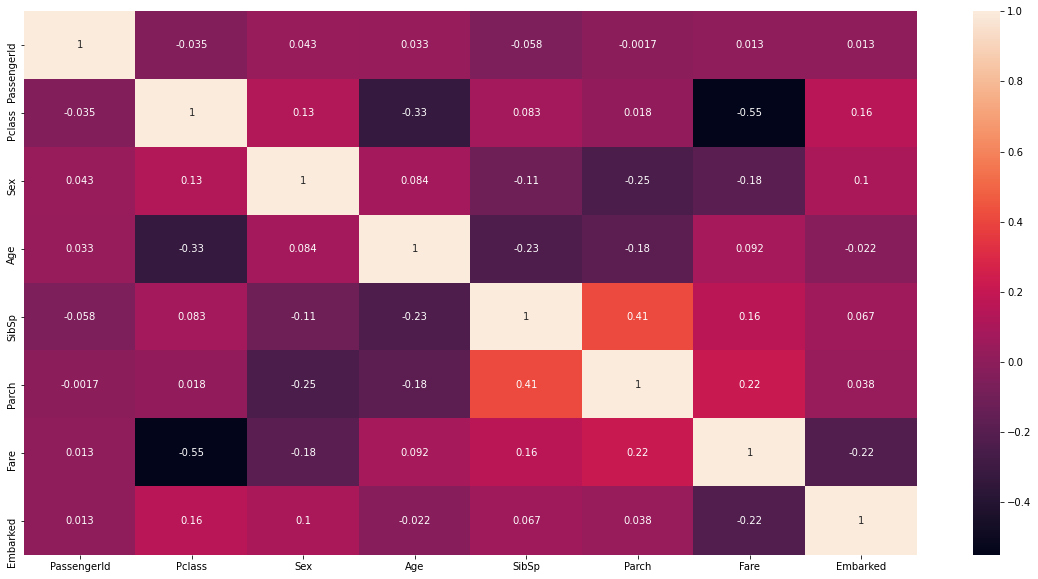

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.73010796, 0.82737724, 0.73769513, ..., 0.52906043, 0.87974057,
        0.58111394],
       [1.72622007, 1.56610693, 1.35557354, ..., 0.52906043, 1.36121993,
        1.93846038],
       [1.72233219, 0.82737724, 1.35557354, ..., 0.52906043, 0.79853997,
        0.58111394],
       ...,
       [1.72233219, 0.82737724, 1.35557354, ..., 2.1410429 , 0.24200664,
        0.58111394],
       [1.72622007, 1.56610693, 0.73769513, ..., 0.52906043, 0.48708246,
        1.93846038],
       [1.73010796, 0.82737724, 0.73769513, ..., 0.52906043, 0.81898658,
        0.67867322]])

In [31]:
threshold=3
print(np.where(z<3))

(array([  0,   0,   0, ..., 890, 890, 890], dtype=int64), array([0, 1, 2, ..., 5, 6, 7], dtype=int64))


In [33]:
df2=df1[(z<3).all(axis=1)]

In [34]:
df2

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,0.693147,0.000000,2.110213,2
1,2,1,0,38.000000,0.693147,0.000000,4.280593,0
2,3,3,0,26.000000,0.000000,0.000000,2.188856,2
3,4,1,0,35.000000,0.693147,0.000000,3.990834,2
4,5,3,1,35.000000,0.000000,0.000000,2.202765,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0.000000,0.000000,2.639057,2
887,888,1,0,19.000000,0.000000,0.000000,3.433987,2
888,889,3,0,29.699118,0.693147,1.098612,3.196630,2
889,890,1,1,26.000000,0.000000,0.000000,3.433987,0


In [35]:
df2.skew()

PassengerId    0.008182
Pclass        -0.631176
Sex           -0.594266
Age            0.275362
SibSp          1.409871
Parch          1.604684
Fare           0.955913
Embarked      -1.208124
dtype: float64

In [36]:
import numpy as np
for col in df2.columns:
    if df2.skew().loc[col]>0.55:
         df2[col]=np.log1p(df2[col])

In [37]:
df2.skew()

PassengerId    0.008182
Pclass        -0.631176
Sex           -0.594266
Age            0.275362
SibSp          1.097903
Parch          1.478642
Fare           0.642638
Embarked      -1.208124
dtype: float64

In [38]:
import numpy as np
for col in df2.columns:
    if df2.skew().loc[col]>0.55:
         df2[col]=np.log1p(df2[col])

In [39]:
df2.skew()

PassengerId    0.008182
Pclass        -0.631176
Sex           -0.594266
Age            0.275362
SibSp          0.975443
Parch          1.421013
Fare           0.528596
Embarked      -1.208124
dtype: float64

In [40]:
df2.dtypes

PassengerId      int64
Pclass           int64
Sex              int32
Age            float64
SibSp          float64
Parch          float64
Fare           float64
Embarked         int32
dtype: object

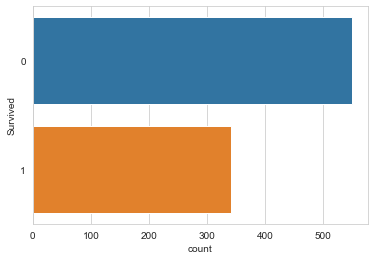

In [43]:
sns.set_style('whitegrid')
sns.countplot(y='Survived',data=df)

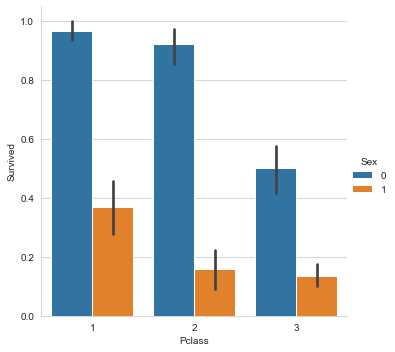

In [47]:
sns.catplot(x="Pclass",y="Survived",hue="Sex",data=df,kind="bar")
plt.show()

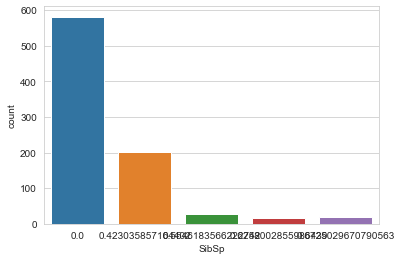

In [45]:
sns.countplot(x='SibSp',data=df2)

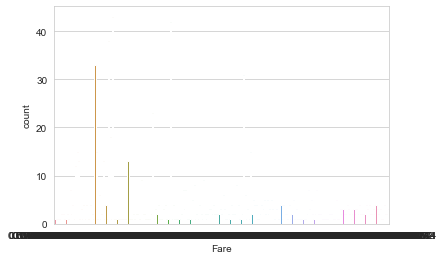

In [48]:
sns.countplot(x='Fare',data=df2)

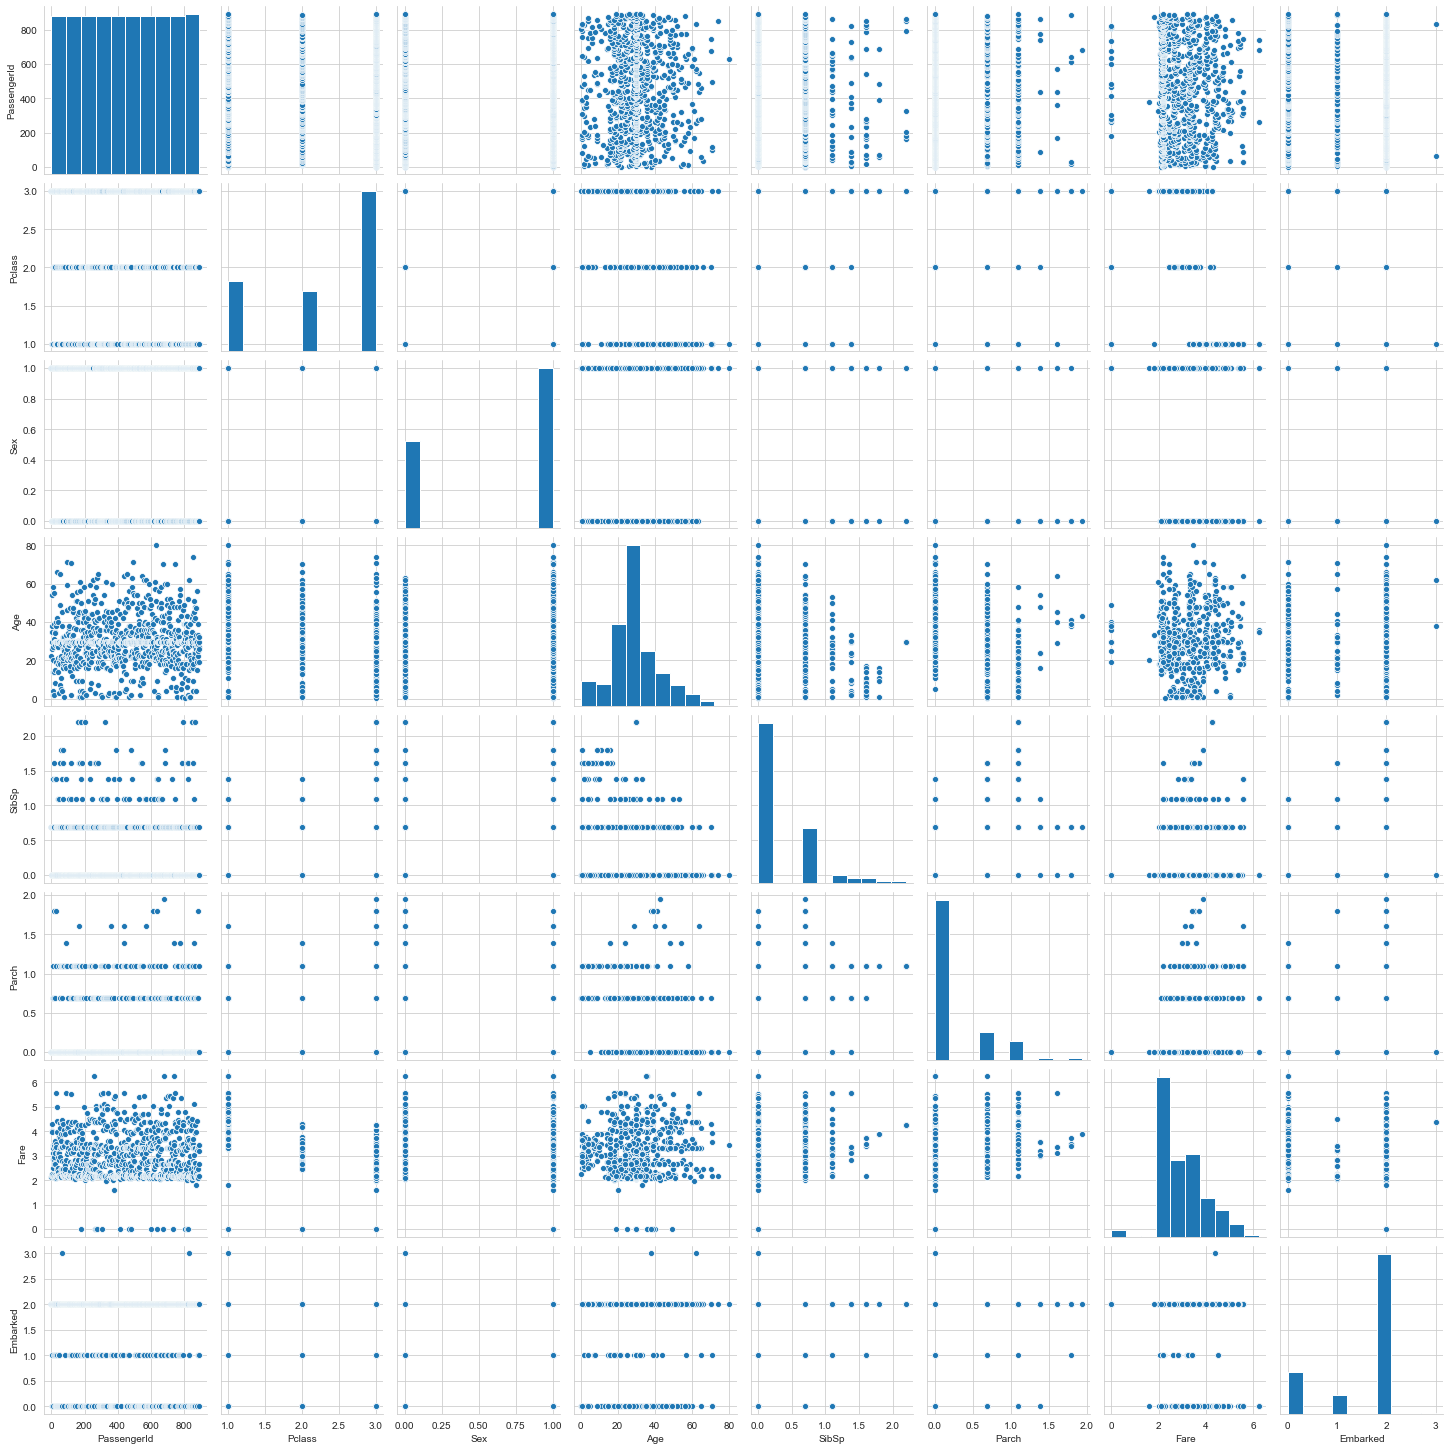

In [56]:
sns.pairplot(df1)

In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df2,df_target):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df2,df_target,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to",i,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i
             

In [58]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
i=maxr2_score(lreg,df2,df_target)

r2 score corresponding to 42 is 1.0
r2 score corresponding to 43 is 1.0
r2 score corresponding to 44 is 1.0
r2 score corresponding to 45 is 1.0
r2 score corresponding to 46 is 1.0
r2 score corresponding to 47 is 1.0
r2 score corresponding to 48 is 1.0
r2 score corresponding to 49 is 1.0
r2 score corresponding to 50 is 1.0
r2 score corresponding to 51 is 1.0
r2 score corresponding to 52 is 1.0
r2 score corresponding to 53 is 1.0
r2 score corresponding to 54 is 1.0
r2 score corresponding to 55 is 1.0
r2 score corresponding to 56 is 1.0
r2 score corresponding to 57 is 1.0
r2 score corresponding to 58 is 1.0
r2 score corresponding to 59 is 1.0
r2 score corresponding to 60 is 1.0
r2 score corresponding to 61 is 1.0
r2 score corresponding to 62 is 1.0
r2 score corresponding to 63 is 1.0
r2 score corresponding to 64 is 1.0
r2 score corresponding to 65 is 1.0
r2 score corresponding to 66 is 1.0
r2 score corresponding to 67 is 1.0
r2 score corresponding to 68 is 1.0
r2 score corresponding to 69

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors, cv=10)
gknr.fit(df2,df_target)
gknr.best_params_

{'n_neighbors': 22}

In [61]:
knr=KNeighborsRegressor(n_neighbors=22)
i=maxr2_score(knr,df2,df_target)

r2 score corresponding to 42 is 0.09992607719880442
r2 score corresponding to 43 is 0.07604666862661835
r2 score corresponding to 44 is 0.026567129268672884
r2 score corresponding to 45 is 0.08851599687376832
r2 score corresponding to 46 is 0.03454174613265537
r2 score corresponding to 47 is 0.059708577494232196
r2 score corresponding to 48 is 0.08602402600481995
r2 score corresponding to 49 is 0.09956976834967257
r2 score corresponding to 50 is 0.005089232699493795
r2 score corresponding to 51 is 0.004176151183193477
r2 score corresponding to 52 is 0.016451910312072826
r2 score corresponding to 53 is 0.05666858373835626
r2 score corresponding to 54 is -0.0019149566512186578
r2 score corresponding to 55 is -0.028082023976742088
r2 score corresponding to 56 is 0.07612171875494766
r2 score corresponding to 57 is 0.11407906457132222
r2 score corresponding to 58 is 0.10806555740934753
r2 score corresponding to 59 is -0.0715375562297309
r2 score corresponding to 60 is 0.03667540792540813
r2

In [62]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,df2,df_target,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,df2,df_target,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(lreg,df2,df_target,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression",cross_val_score(lreg,df2,df_target,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 1.0
standard deviation in r2 score for Linear Regression 0.0

Mean r2 score for KNN Regression: 1.0
standard deviation in r2 score for KNN Regression 0.0


In [63]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parametors={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parametors,cv=10)
clf.fit(df2,df_target)
clf.best_params_

{'alpha': 0.001}

In [64]:
lsreg=Lasso(alpha=0.001)
i=maxr2_score(lsreg,df2,df_target)

r2 score corresponding to 42 is 0.9999811445039617
r2 score corresponding to 43 is 0.9999806767709912
r2 score corresponding to 44 is 0.9999797693352745
r2 score corresponding to 45 is 0.9999812478221776
r2 score corresponding to 46 is 0.9999801547312107
r2 score corresponding to 47 is 0.9999807595592993
r2 score corresponding to 48 is 0.999980175433697
r2 score corresponding to 49 is 0.9999824095449257
r2 score corresponding to 50 is 0.9999789864472254
r2 score corresponding to 51 is 0.9999799515476752
r2 score corresponding to 52 is 0.9999795856678395
r2 score corresponding to 53 is 0.9999810382756642
r2 score corresponding to 54 is 0.9999799631358403
r2 score corresponding to 55 is 0.9999801323351123
r2 score corresponding to 56 is 0.999979929531067
r2 score corresponding to 57 is 0.9999811055675281
r2 score corresponding to 58 is 0.9999815252064655
r2 score corresponding to 59 is 0.9999762102906996
r2 score corresponding to 60 is 0.9999800380587565
r2 score corresponding to 61 is 0

In [65]:
print("Mean r2 score for Lasso Regression:",cross_val_score(lreg,df2,df_target,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lreg,df2,df_target,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression: 1.0
standard deviation in r2 score for Lasso Regression 0.0


In [66]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(df2,df_target)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [67]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,df2,df_target,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(lreg,df2,df_target,cv=5,scoring="r2").std())

Mean r2 score for gradient boosting Regression: 0.999956374831509
standard deviation in r2 score for gradient boosting Regression 0.0


In [68]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(df2,df_target)
clf.best_params_

{'base_estimator': LogisticRegression(),
 'learning_rate': 0.001,
 'n_estimators': 10}

In [69]:
print("Mean r2 score for ada boosting Regression:",cross_val_score(ada_reg,df2,df_target,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for ada boosting Regression",cross_val_score(ada_reg,df2,df_target,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression: 1.0
standard deviation in r2 score for ada boosting Regression 0.0


In [71]:
i=maxr2_score(ada_reg,df2,df_target)

r2 score corresponding to 42 is 1.0
r2 score corresponding to 43 is 1.0
r2 score corresponding to 44 is 1.0
r2 score corresponding to 45 is 1.0
r2 score corresponding to 46 is 1.0
r2 score corresponding to 47 is 1.0
r2 score corresponding to 48 is 1.0
r2 score corresponding to 49 is 1.0
r2 score corresponding to 50 is 1.0
r2 score corresponding to 51 is 1.0
r2 score corresponding to 52 is 1.0
r2 score corresponding to 53 is 1.0
r2 score corresponding to 54 is 1.0
r2 score corresponding to 55 is 1.0
r2 score corresponding to 56 is 1.0
r2 score corresponding to 57 is 1.0
r2 score corresponding to 58 is 1.0
r2 score corresponding to 59 is 1.0
r2 score corresponding to 60 is 1.0
r2 score corresponding to 61 is 1.0
r2 score corresponding to 62 is 1.0
r2 score corresponding to 63 is 1.0
r2 score corresponding to 64 is 1.0
r2 score corresponding to 65 is 1.0
r2 score corresponding to 66 is 1.0
r2 score corresponding to 67 is 1.0
r2 score corresponding to 68 is 1.0
r2 score corresponding to 69

In [72]:
x_train,x_test,y_train,y_test=train_test_split(df2,df_target,random_state=46,test_size=0.20)
lreg=LogisticRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [73]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is: 0.0
r2_score is: 1.0


In [74]:
import joblib
joblib.dump(ada_reg,"titanic_dataset.pkl")

['titanic_dataset.pkl']